# Аудиториска вежба 2: Web scraping

### <font color='green'>Motivation for web scraping</font>
Today, there are many websites that contain very large amount of valulable data like stock prices, product details, sports stats, company contacts etc.

Web scraping refers to the extraction of data from a website. This information is collected and then exported into a format that can be used further in many different ways.

Some websites offer an API tool for their data. In this case, we should try not to break the policy of that site and use the API tool as they reccomend.

If there is no publicly available dataset for our certain need, as well as no publicly available API tool, we can search for websites that have the specific data (and allow scraping) and scrape it.


### <font color='pink'>The crawler and The scraper</font>

#### **The crawler**
The crawler is the "spider", or the AI (Artificial Intelligence) that browses the Internet to index and search for content by following links.
Crawling for data is the process of collecting and preparing the data.

#### **The scraper**
The scraper is a specialized tool that accurately and quickly extracts data from a website.

### <font color='orange'>3 Steps of Web Scraping</font>

#### **Step 1: Find a target**
You first need to find the target website and extract the data you want.

#### **Step 2: Retrieve data and extract raw data**
Next, you retrieve the data in HTML format. 
Then, you parse the data in order to extract the raw data that you need (and separate it from the noise surrounding it).

#### **Step3: Store data as specified in the project**
Finally, the data is stored in the format and to the exact spexifications of the project (usually CSV, TSV, JSON).

### <font color='green'>Pandas Library</font>
*   Loading and saving data
*   Column insertion and deletion
*   Data selection
*   Column and row renaming
*   Row deletion
*   Data sorting
*   Handling missing values
*   Handling duplicate values
*   Data exploration
*   Data visualization

### <font color='red'>The goal of this exercise</font>
The goal of this exercise is to get the headlines of the most read and latest news from CNBC. To these news we also need to add the date of publication and the class to which it belongs.

All in all, the goal is to gather financial news data and create a database from it, so that we can use it for further analysis in this field.



In [40]:
#Note: Imports for the modules that we need
import numpy as np
import pandas as pd

#Note: Requests is a simple, yet elegant, HTTP library.
#Resource: https://pypi.org/project/requests/
import requests

#Note: Beautiful Soup is a library that makes it easy to scrape information from web pages. 
#Note: In the following resource you can find a way to select any part of a HTML content.
#Resource: https://pypi.org/project/beautifulsoup4/
from bs4 import BeautifulSoup

#Note: IPython is a command shell for interactive computing in Python.
#Note: IPython.display is a module for display tools in IPython.
#Resource: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
from IPython.display import HTML

In [41]:
#Note: We can disable warnings for our requests.
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

The website we want to get news data from is CNBS (link and image below).

In [42]:
url = 'https://www.cnbc.com/finance/'

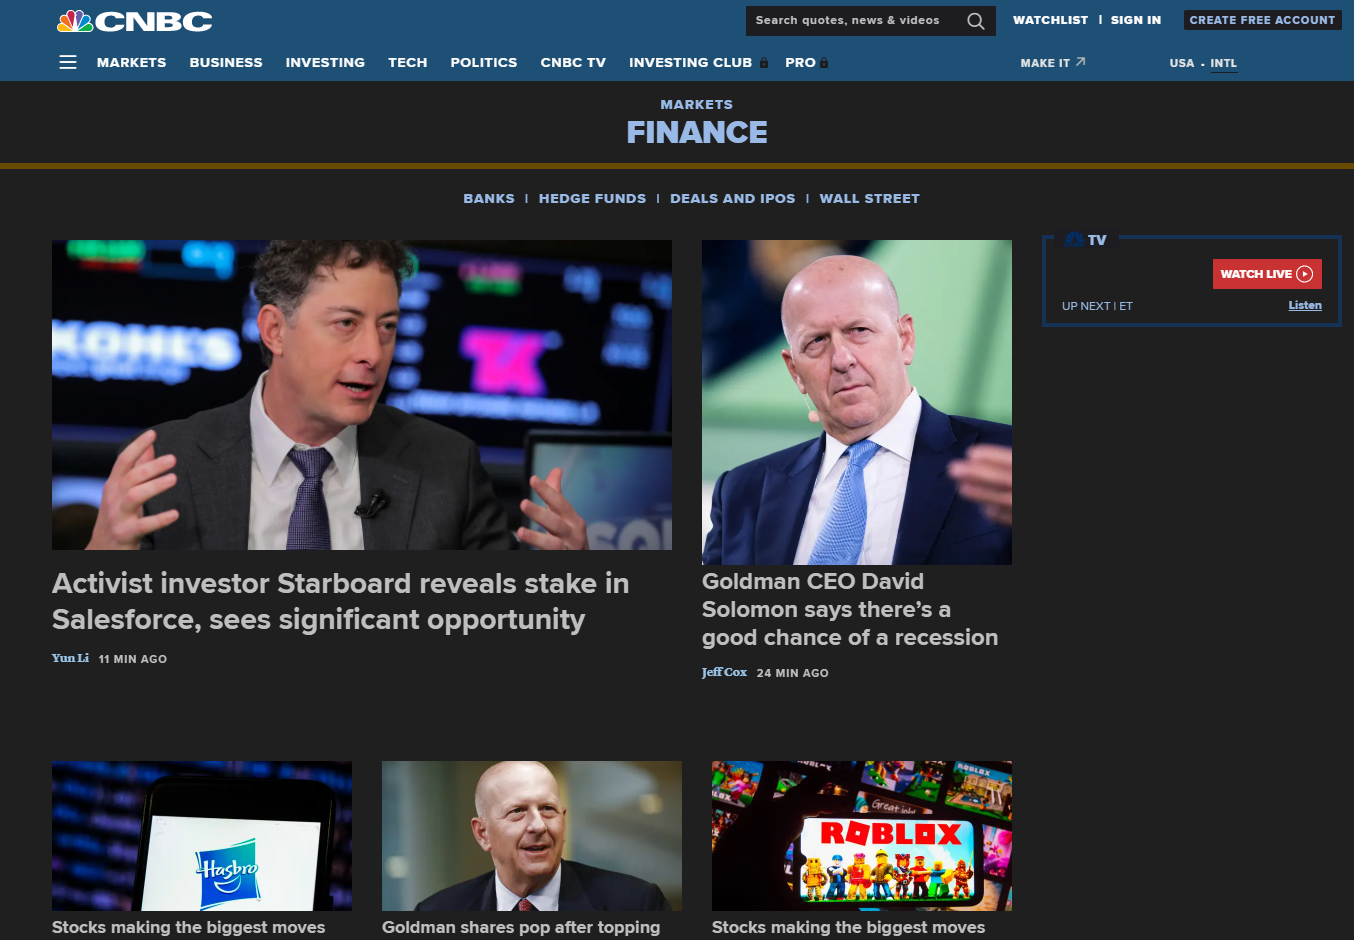

In [43]:
response = requests.get(url)
response

<Response [200]>

In [44]:
type(response)

requests.models.Response

In [45]:
raw_html = response.text
type(raw_html)

str

In [46]:
raw_html[:500]

'<!DOCTYPE html><html lang="en" prefix="og=https://ogp.me/ns#" itemscope="" itemType="https://schema.org/WebPage"><head><meta name="format-detection" content="telephone=no"/><style type="text/css">@charset "UTF-8";.Modal-modalBackground{background:#000000b3;height:100%;left:0;overflow-y:auto;position:fixed;top:0;transition:background-color .4s;width:100%;z-index:100001}.Modal-bottomModal.Modal-modal{background:#f8f8f8;border-radius:3px;bottom:0;box-shadow:5px 5px 20px #1717171a;display:inline-blo'

In [47]:
#Note: To represent the HTML code and make it easy to use, we use Beautiful Soup.
html = BeautifulSoup(raw_html, "html.parser")

In [48]:
type(html)

bs4.BeautifulSoup

In [49]:
#Note: We can now use the HTML code as normally, using selection by tag, id etc.

#Note: Here we select the first element that is a title.
html.select_one("title")

<title itemprop="name">Finance News</title>

Now, let's select exactly what we need for our task.

In [50]:
#Note: First, we select the card title for each card on the front page.
card_titles = html.select('.Card-title')
len(card_titles)

34

In [51]:
card_titles[0]

<a class="Card-title" href="https://www.cnbc.com/2023/12/02/case-for-gold-fever-newedge-wealth-sees-record-rush-intensifying-.html" target="">Case for gold fever: NewEdge Wealth sees record rush intensifying </a>

In [52]:
card_titles[15]

<a class="Card-title" href="https://www.cnbc.com/2023/11/30/cathie-woods-flagship-etf-is-up-30percent-on-pace-for-its-best-month-ever.html" target="">Cathie Wood’s Innovation ETF is up 31% in November, notching its best month ever</a>

In [53]:
type(card_titles[0])

bs4.element.Tag

In [54]:
card_titles[0].prettify()

'<a class="Card-title" href="https://www.cnbc.com/2023/12/02/case-for-gold-fever-newedge-wealth-sees-record-rush-intensifying-.html" target="">\n Case for gold fever: NewEdge Wealth sees record rush intensifying\n</a>'

In [55]:
type(card_titles[0].prettify())

str

In [56]:
#Note: HTML provides the HTML suuport.
#Note: The prettify() method from Beautiful Soup returns a nicely formatted Unicode string.
HTML(card_titles[0].prettify())

In [70]:
#Note: We can see that the title we need is in the <div> element within the one we selected using the .Card-title class.
#Note: Therefore, we now select that div, and get the text content within it.
titles = []

for i in range(0, len(card_titles)):
    titles.append(card_titles[i].text)

In [71]:
print(card_titles[0].text)

Case for gold fever: NewEdge Wealth sees record rush intensifying 


In [72]:
titles

['Case for gold fever: NewEdge Wealth sees record rush intensifying ',
 'Investors mourn the loss of one-of-a-kind legend Charlie Munger',
 'Zero-day commodity options have now entered the ETF space',
 'Not saving in your 401(k)? Your employer may re-enroll you',
 'Stocks making biggest moves midday: Tesla, Disney, Alibaba, Ulta Beauty and more',
 "Fed Chair Powell calls talk of cutting rates 'premature'",
 'Watch Federal Reserve Chair Jerome Powell speak live in Atlanta on policy',
 'Stocks making the biggest moves premarket: Pfizer, Disney, Tesla and more',
 "Robinhood CEO defends payment for order flow, says practice is 'here to stay'",
 'Charlie Munger and Warren Buffett were unable to pull off one last deal together',
 'Munger said Berkshire would be worth double if it had used leverage',
 "China consumption shows 'no sign' of a strong V-shaped recovery, McKinsey says",
 'SEC meets with Grayscale, BlackRock about potential bitcoin ETFs',
 'Stocks making biggest moves after hours: 

In [73]:
card_times = html.find_all("span", {"class": "Card-time"})

In [74]:
type(card_times[0])

bs4.element.Tag

In [75]:
#Note: We try to take all the times in this manner, but we have a problem with the times like this one 'an hour ago'.
#Note: Therefore, we try another approach next. 
times = []

for i in range(0, len(card_times)):
    times.append(card_times[i].text)

In [76]:
times

['Sat, Dec 2nd 2023',
 'Sat, Dec 2nd 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Thu, Nov 30th 2023',
 'Fri, Dec 1st 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023']

In [77]:
#Note: Using this approach, we first avoid the problem with the times like this one 'an hour ago'.
#Note: Then, using strftime with the correct format, we match the formats for all dates in the times list.
#Note: Having the dates be in the same format is very important for later work!

from datetime import date

times = []

for i in range(0, len(card_times)):
    if 'ago' in card_times[i].text:
        times.append(date.today().strftime("%a, %b %dth %Y"))
    else:
        times.append(card_times[i].text)

In [78]:
times

['Sat, Dec 2nd 2023',
 'Sat, Dec 2nd 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Fri, Dec 1st 2023',
 'Thu, Nov 30th 2023',
 'Fri, Dec 1st 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Thu, Nov 30th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023',
 'Wed, Nov 29th 2023']

In [79]:
#Note: We need to check if the titles and times lists are of same size, because we want to match them later.
len(titles) == len(times)

True

In [80]:
#Note: Next, we select the class for each title.
card_classes = html.select(".Card-eyebrow")
len(card_classes)

29

In [81]:
card_classes[0]

<a class="Card-eyebrow" href="https://www.cnbc.com/federal-reserve/"><div>Federal Reserve</div></a>

In [82]:
#Note: We use the same approach as with the titles, as they are structured in the same manner.
classes = []

for i in range(0, len(card_classes)):
    classes.append(card_classes[i].select_one("div").text)

In [83]:
classes

['Federal Reserve',
 'Federal Reserve',
 'Market Insider',
 'Tech',
 'Markets',
 'Markets',
 'China Economy',
 'Markets',
 'Market Insider',
 'Personal Finance',
 'Markets',
 'Market Insider',
 'Personal Finance',
 'Market Insider',
 'Banks',
 'Tech',
 'Tech',
 'Market Insider',
 'Market Insider',
 'Markets',
 'Finance',
 'The Bottom Line',
 'Markets',
 'Market Insider',
 'Economy',
 'Tech',
 'Markets',
 'Investing',
 'Markets']

In [84]:
#Note: We see that the classes and titles lists do not have the same size, which is a problem.
#Note: We can drop or fill the missing values. We will fill them for this exercise.
#Note: We will discuss both options in greater detail later in the course.
len(classes) == len(titles)

False

In [85]:
classes = ["No category", "No category", "No category", "No category", "No category"] + classes

In [86]:
len(classes) == len(titles)

True

In [87]:
#Note: First way to create a pandas DataFrame from our data.
#Note: It's better to put the date in the first column.
#Note: The head() function is especially useful for large datasets!
data = []

for i in range(0, len(classes)):
    item = {}
    item['Date'] = times[i]
    item['Title'] = titles[i]
    item['Class'] = classes[i]
    data.append(item)

df = pd.DataFrame(data)
df.head(5)

,Date,Title,Class
0,"Sat, Dec 2nd 2023",Case for gold fever: NewEdge Wealth sees recor...,No category
1,"Sat, Dec 2nd 2023",Investors mourn the loss of one-of-a-kind lege...,No category
2,"Fri, Dec 1st 2023",Zero-day commodity options have now entered th...,No category
3,"Fri, Dec 1st 2023",Not saving in your 401(k)? Your employer may r...,No category
4,"Fri, Dec 1st 2023","Stocks making biggest moves midday: Tesla, Dis...",No category


In [88]:
#Note: Second way to create a pandas DataFrame from our data.
matrix = []

for i in range(0, len(classes)):
    matrix.append([times[i], titles[i], classes[i]])

df_new = pd.DataFrame(np.array(matrix), columns=['Date', 'Title', 'Class'])
df_new.head(5)

,Date,Title,Class
0,"Sat, Dec 2nd 2023",Case for gold fever: NewEdge Wealth sees recor...,No category
1,"Sat, Dec 2nd 2023",Investors mourn the loss of one-of-a-kind lege...,No category
2,"Fri, Dec 1st 2023",Zero-day commodity options have now entered th...,No category
3,"Fri, Dec 1st 2023",Not saving in your 401(k)? Your employer may r...,No category
4,"Fri, Dec 1st 2023","Stocks making biggest moves midday: Tesla, Dis...",No category


In [93]:
#Note: We can save the result in a csv file located somewhere in our Drive.
# df.to_csv('/content/drive/MyDrive/ВНП 22 23 - Аудиториски вежби/02/cnbc_news_titles.csv')

In [97]:
df.to_csv('prv_kol_datasets\\aud2\cnbc_news_titles.csv')